# **Project Name**    - Term Deposit Subscription Prediction using Machine Learning



##### **Project Type**    -Classification
##### **Contribution**    - Individual
##### **Name-**   - Janit Berwal


In [281]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Project Summary -**

Banks often run marketing campaigns to convince customers to invest in term deposits — long-term savings plans with fixed interest. But not all customers are interested, and calling uninterested people wastes both time and money.

In this project, our goal was to predict whether a customer will subscribe to a term deposit or not, based on their information such as:

Age, Job, Marital Status

Balance, Duration of last contact

Whether they were contacted before, and other attributes

By training a Machine Learning model on past campaign data, we can help banks:

Target the right customers more efficiently

Reduce unnecessary calls

Increase success rates of marketing campaigns

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to build a machine learning model that can predict whether a customer will subscribe to a term deposit, based on features such as age, job, marital status, past interactions, and more.
This helps banks target the right customers, optimize resources, and improve campaign effectiveness.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [282]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [283]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Dataset ML/Copy of bank-full.csv', delimiter=';')

### Dataset First View

In [284]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [285]:
# Dataset Rows & Columns count
df.shape

(45211, 17)

### Dataset Information

In [286]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [287]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [288]:
# Missing Values/Null Values Count
df.isnull().sum()
# it means that null values sum in our dataset is 0

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


<Axes: >

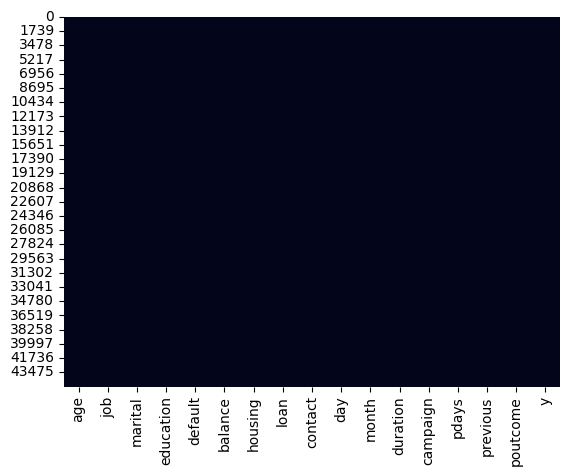

In [289]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

We understood that our dataset does not contains any null values

## ***2. Understanding Your Variables***

In [290]:
# Dataset Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [291]:
# Dataset Describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [292]:
# Check Unique Values for each variable.
df.nunique()

,0
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


## 3. ***Data Wrangling***

### Data Wrangling Code

In [293]:
# Write your code to make your dataset analysis ready.
df['default_num'] = df['default'].map({'yes': 1, 'no': 0})
df['housing_num'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan_num'] = df['loan'].map({'yes': 1, 'no': 0})
df['y_num'] = df['y'].map({'yes': 1, 'no': 0})  # Target variable


In [294]:
#did one Hot Encoding for these columns
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'poutcome'], drop_first=True)


In [295]:
print(df.columns.tolist())

['age', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y', 'default_num', 'housing_num', 'loan_num', 'y_num', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_telephone', 'contact_unknown', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [296]:
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
             'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df['month_num'] = df['month'].map(month_map)


In [297]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_num
0,58,no,2143,yes,no,5,may,261,1,-1,...,False,False,True,False,False,True,False,False,True,5
1,44,no,29,yes,no,5,may,151,1,-1,...,True,True,False,False,False,True,False,False,True,5
2,33,no,2,yes,yes,5,may,76,1,-1,...,False,True,False,False,False,True,False,False,True,5
3,47,no,1506,yes,no,5,may,92,1,-1,...,False,False,False,True,False,True,False,False,True,5
4,33,no,1,no,no,5,may,198,1,-1,...,True,False,False,True,False,True,False,False,True,5


In [298]:
df.drop(columns=['default', 'housing', 'loan', 'y','month'], inplace=True)


In [299]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default_num', 'housing_num', 'loan_num', 'y_num', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month_num'],
      dtype='object')

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   default_num          45211 non-null  int64
 8   housing_num          45211 non-null  int64
 9   loan_num             45211 non-null  int64
 10  y_num                45211 non-null  int64
 11  job_blue-collar      45211 non-null  bool 
 12  job_entrepreneur     45211 non-null  bool 
 13  job_housemaid        45211 non-null  bool 
 14  job_management       45211 non-null  bool 
 15  job_retired          45211 non-null  bool 
 16  job_self-employed    4

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Count')

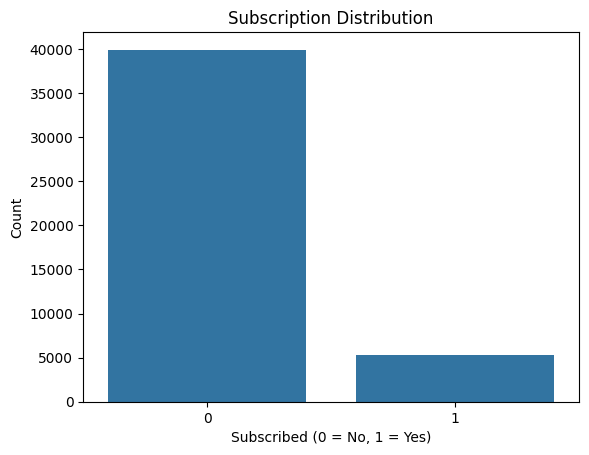

In [348]:
# Chart - 1 visualization code
sns.countplot(data=df, x='y_num')
plt.title('Subscription Distribution')
plt.xlabel('Subscribed (0 = No, 1 = Yes)')
plt.ylabel('Count')


##### 1. Why did you pick the specific chart?

Bar plot shows the best comparison between output yes and no and also the differnce is clearly visible.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that this is a imbalance dataset means the in thr y columns yes are very less as compared to no. We can observe that clients who did not subscribe to term deposite are nearly 40 k whereas the client who subscribed are very less as compared 5k.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Text(0, 0.5, 'Duration')

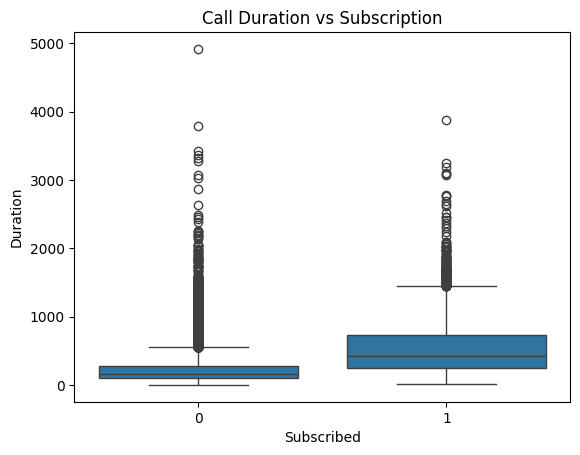

In [349]:
# Chart - 2 visualization code
sns.boxplot(data=df, x='y_num', y='duration')
plt.title('Call Duration vs Subscription')
plt.xlabel('Subscribed')
plt.ylabel('Duration')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We can see that mostly the call duration of clients who invested in term deposite are more as they were interseted in it , whereas clients who were not intersed have less call duration and doest not buy but we can see there are several outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'Balance Distribution')

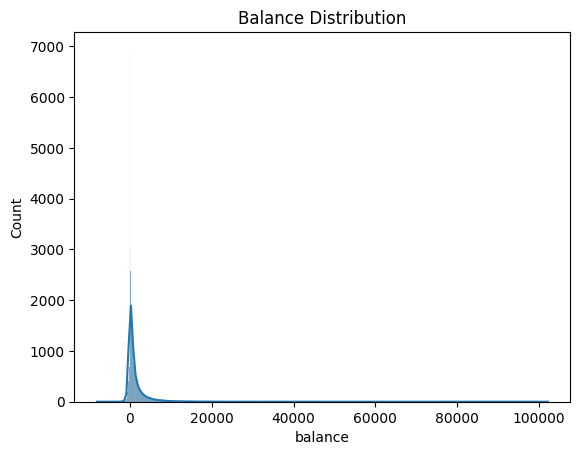

In [351]:
# Chart - 3 visualization code
sns.histplot(df['balance'], kde=True)
plt.title('Balance Distribution')


##### 1. Why did you pick the specific chart?

It shows how clients bank balance is associated

##### 2. What is/are the insight(s) found from the chart?

Mostly clients have balance zero or nearly positive but mostly its less than 5k

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 1.0, 'Subscription Rate by Job Type')

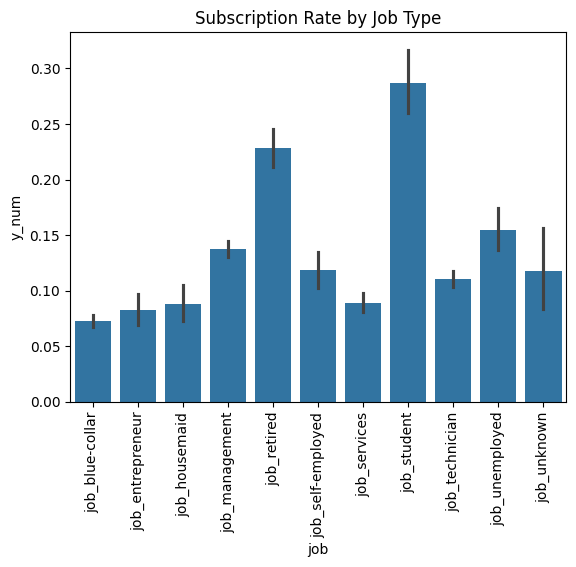

In [352]:
# Chart - 4 visualization code
job_cols = [col for col in df.columns if col.startswith('job_')]
job_df = df[job_cols + ['y_num']]

job_df = job_df.melt(id_vars='y_num', var_name='job', value_name='has_job')
job_df = job_df[job_df['has_job']]
sns.barplot(data=job_df, x='job', y='y_num')
plt.xticks(rotation=90)
plt.title('Subscription Rate by Job Type')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Higher bars represent the higher subscription rates ,


Blue-collar or services jobs have lower rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0, 0.5, 'Duration')

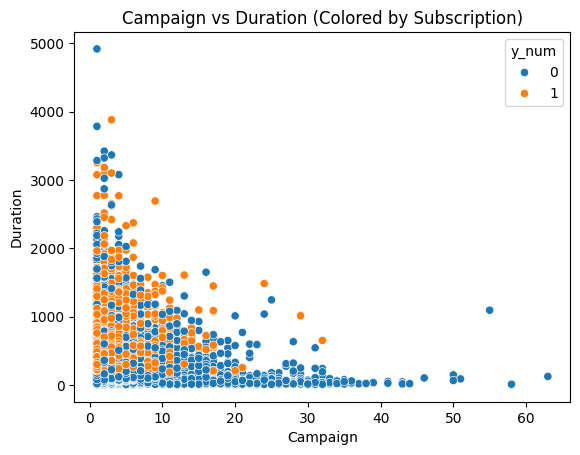

In [356]:
# Chart - 5 visualization code
sns.scatterplot(data=df, x='campaign', y='duration', hue='y_num')
plt.title('Campaign vs Duration (Colored by Subscription)')
plt.xlabel('Campaign')
plt.ylabel('Duration')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Repeated calls with short durations rarely lead to success.

Shows that quality of interaction matters more than quantity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0, 0.5, 'Subscription Rate')

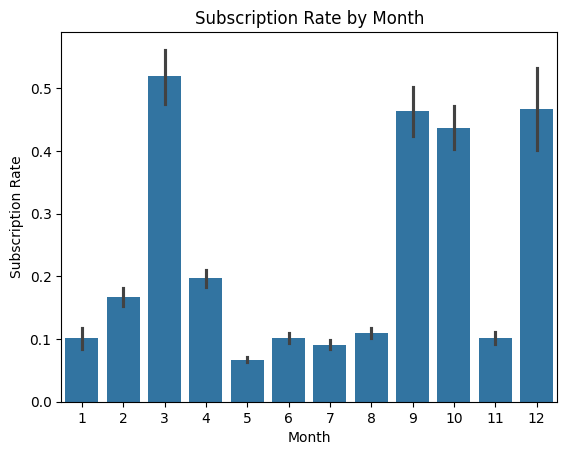

In [355]:

sns.barplot(data=df, x='month_num', y='y_num')
plt.title('Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Some months (like March, September) tend to show higher success rates.

 Whereas ( May) are often heavily used but less effective.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

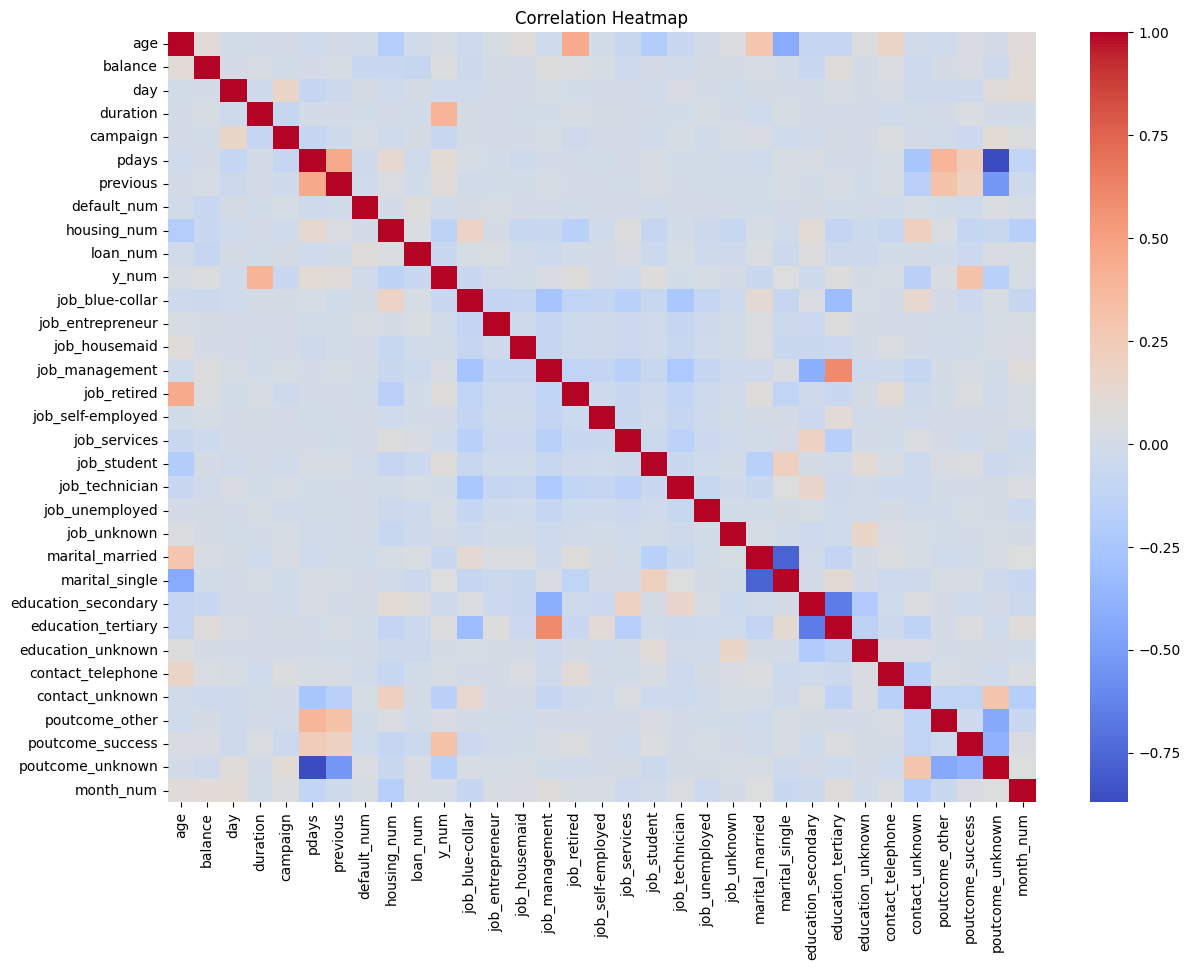

In [350]:
# Correlation Heatmap visualization code
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 8 - Pair Plot

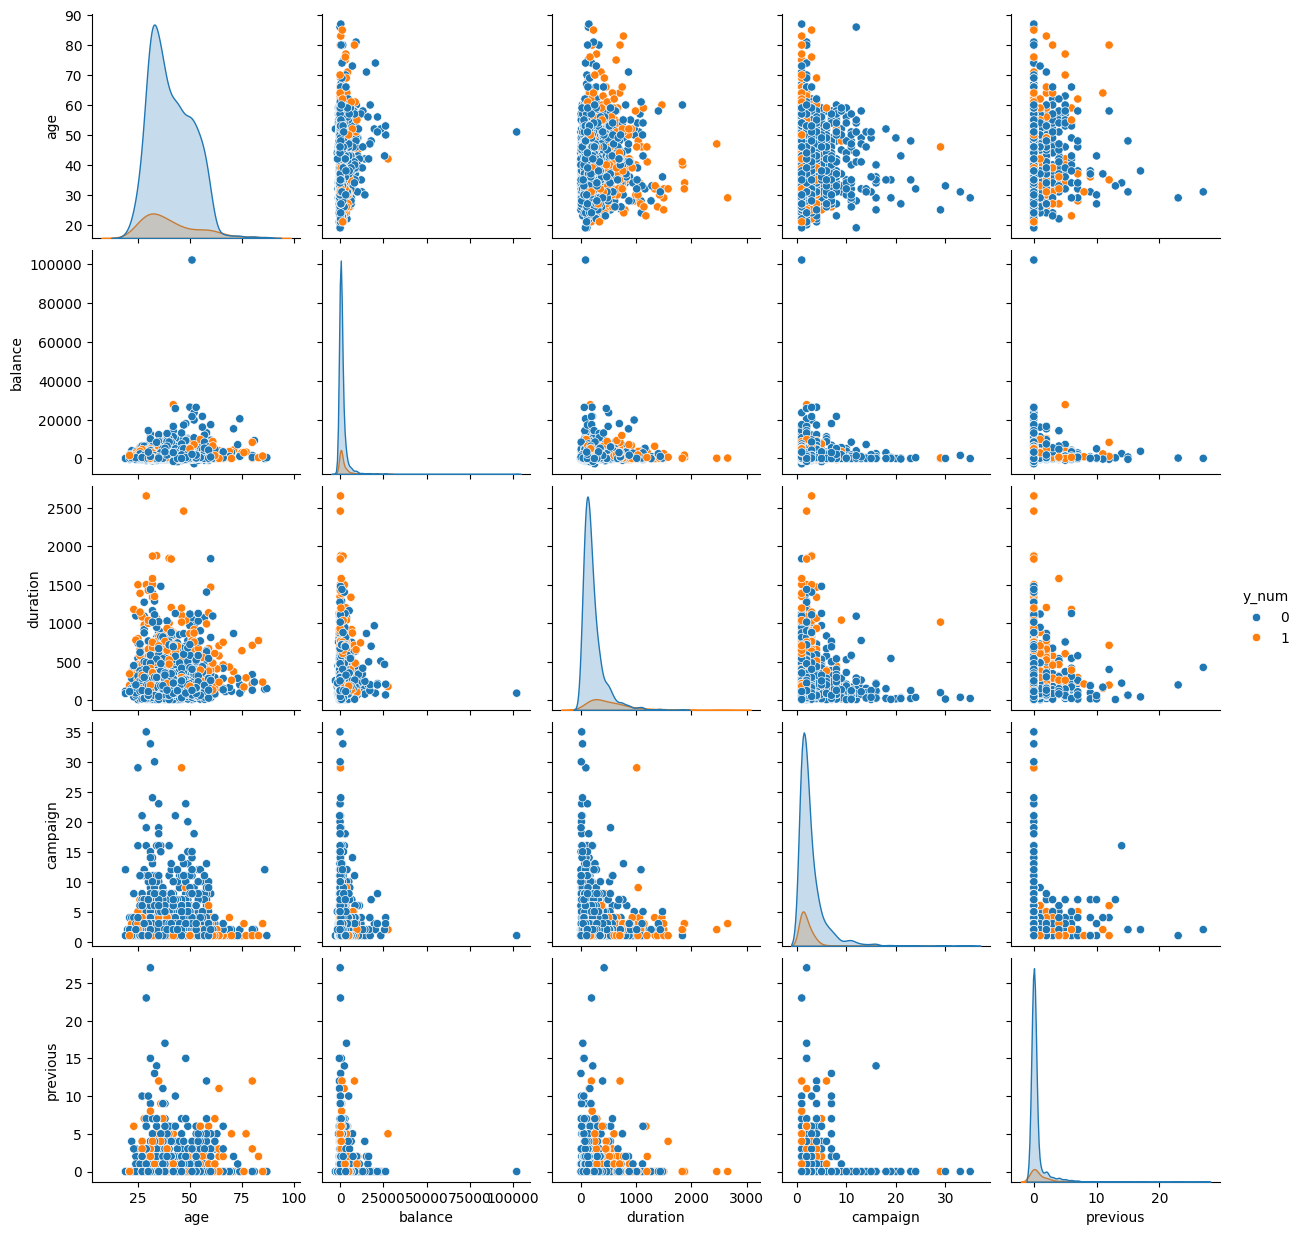

In [357]:
# Pair Plot visualization code
subset = ['age', 'balance', 'duration', 'campaign', 'previous', 'y_num']
sns.pairplot(df[subset].sample(2000), hue='y_num', diag_kind='kde')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [315]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [316]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [317]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [318]:
# Handling Missing Values & Missing Value Imputation
# THERE ARE NO NULL VALUES PRESENT IN OUR DATASET

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [319]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [320]:
# Encode your categorical columns
#done encoding already in data wrangling


#### What all categorical encoding techniques have you used & why did you use those techniques?

convertes many colums to binary 0 or 1 for colums like 0 and 1
also used hot Encoding  for colums like marital and education
and mapped the month from 1 to 12 on the basis of  jan to dec

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [321]:
# Expand Contraction

#### 2. Lower Casing

In [322]:
# Lower Casing

#### 3. Removing Punctuations

In [323]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [324]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [325]:
# Remove Stopwords

In [326]:
# Remove White spaces

#### 6. Rephrase Text

In [327]:
# Rephrase Text

#### 7. Tokenization

In [328]:
# Tokenization

#### 8. Text Normalization

In [329]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [330]:
# POS Taging

#### 10. Text Vectorization

In [331]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [332]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [333]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [334]:
# Transform Your data

### 6. Data Scaling

In [335]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [336]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [358]:
# Split your data to train and test. Choose Splitting ratio wisely.
x=df.drop(columns=['y_num'])
y=df['y_num']

In [360]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [361]:
print('Shape of X_train:{}'.format(x_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(x_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(31647, 32)
Shape of y_train:(31647,)
Shape of X_test:(13564, 32)
Shape of y_test:(13564,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [363]:
# Handling Imbalanced Dataset (If needed)
# yes the dataset is highly imbalanced
# Using SMOTE

from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
x_train_smt, y_train_smt = smt.fit_resample(x_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: y_num
0    27953
1     3694
Name: count, dtype: int64

Dataset After: y_num
0    27953
1    27953
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In undersampling, we remove data from the majority class (e.g., many "No" examples), which can lead to loss of valuable information.

SMOTE avoids this by adding data instead of removing.

## ***7. ML Model Implementation***

### ML Model - 1

In [365]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

model = LogisticRegression(max_iter=1000)
# Fit the Algorithm
model.fit(x_train_smt, y_train_smt)

# Predict on the model
y_pred = model.predict(x_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nPrecision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[10870  1099]
 [  742   853]]

Precision Score: 0.4369877049180328
Recall Score: 0.534796238244514

Accuracy Score: 0.8642730757888528


We can see that the accuracy score it quite good its 86.4 percentage but as initiaaly our datset was imbalanced so it may be a mess

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

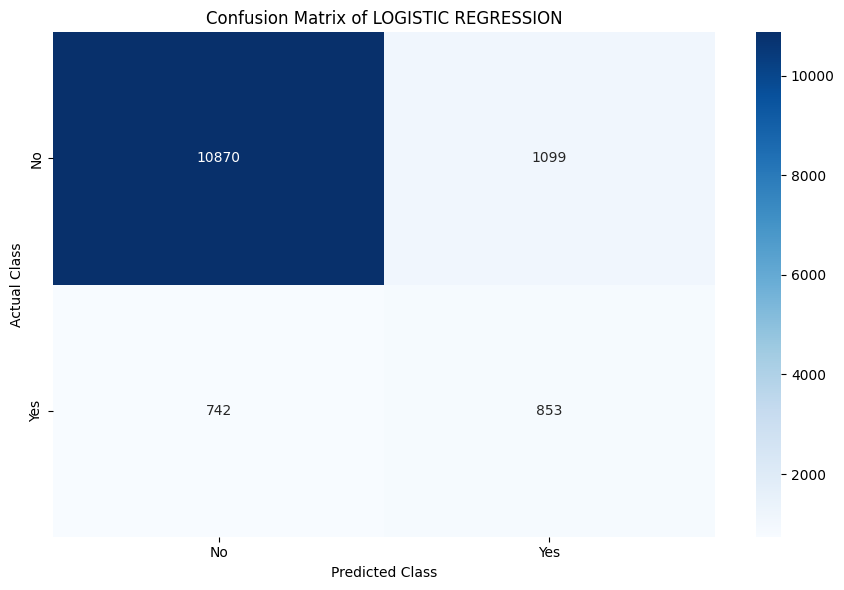

In [366]:
# Visualizing evaluation Metric Score chart

# Confusion matrix values
conf_matrix = np.array([[10870, 1099],
                        [742, 853]])

# Labels
labels = ['No', 'Yes']

# Plotting the heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix of LOGISTIC REGRESSION', fontsize=12)
plt.tight_layout()
plt.show()



This is the visual representaion of confusion matrix

True Negatives (TN): 10,870 — actual NO, predicted NO

False Positives (FP): 1,099 — actual NO, predicted "Yes"

False Negatives (FN): 742 — actual YES, predicted NO

True Positives (TP): 853 — actual YES, predicted YES

#### 2. Cross- Validation & Hyperparameter Tuning

In [341]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [367]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_smt, y_train_smt)

# Predict on test data
y_pred_dt = dt_model.predict(x_test)

# Metrics
dt_confusion = confusion_matrix(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Print metrics
print("DECISION TREE")
print("Confusion Matrix:\n", dt_confusion)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("Accuracy:", dt_accuracy)



DECISION TREE
Confusion Matrix:
 [[10774  1195]
 [  777   818]]
Precision: 0.40635866865375064
Recall: 0.5128526645768025
Accuracy: 0.8546151577705692


The accuracy reduced a little in desicison tree its 85.3 % whereas in logistic regression its was 86.4%

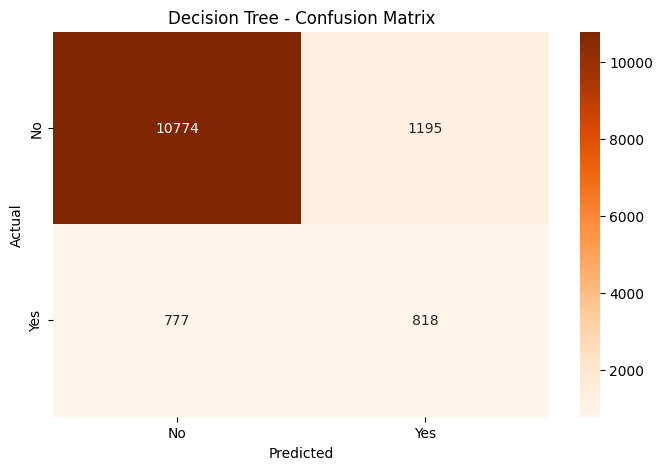

In [368]:
# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(dt_confusion, annot=True, cmap='Oranges', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [343]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [371]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_smt, y_train_smt)

# Predict on test data
y_pred_rf = rf_model.predict(x_test)

# Metrics
rf_confusion = confusion_matrix(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print metrics
print("RANDOM FOREST")
print("Confusion Matrix:\n", rf_confusion)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("Accuracy:", rf_accuracy)


RANDOM FOREST
Confusion Matrix:
 [[11264   705]
 [  795   800]]
Precision: 0.53156146179402
Recall: 0.5015673981191222
Accuracy: 0.8894131524624005


The accuracy improved in Random forest it become 99.9 percent which is almost ewual to 89% which is very good accuracy

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

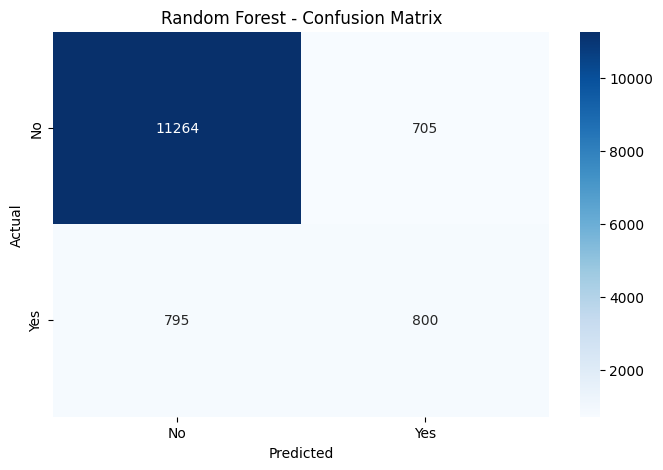

In [370]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8, 5))
sns.heatmap(rf_confusion, annot=True, cmap='Blues', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [346]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1.The evaluation matrix which I considered best is of Ramdom forest as it gave us best accuracy among all models.


2.Even after applying smote for making the data balanced , it still gave good accuracy


3.It can handle larget data set

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random forest , we chooose it because its gave better result than logistic regression modeal and also from Decision tree model

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model which we used is Randon Forest Model and the most import columns are duration and previous

# **Conclusion**

1. Firstly we analysed the data and perdformed EDA on our dataset and found out that the most important colums are duration , campaign and previous by correlation heatmap

2. Then we found out that there were no missing values and also there were no null values.

3. We noticed that out data set is imbalanced and we need to balance it out , So for this we used smote method

4. Then after making our data balanced we implemended various models like Linear Regression , Decision Tree and Random Forest .


=> In this project, we built a machine learning model to help a bank predict whether a customer is likely to subscribe to a term deposit. After trying out multiple models—including Logistic Regression, Decision Tree, and Random Forest—we found that Random Forest performed the best overall, especially in terms of accuracy and recall.

=>With this approach, banks can now focus their marketing efforts on customers who are more likely to say yes, saving both time and resources while increasing conversion rates.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***